In [217]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [218]:
data_types = {"user_id": str, "item_id": str, "rating": np.float64}
user_item_ratings = pd.read_csv("../tests/test_data/user_item_ratings.csv", dtype=data_types)
user_item_ratings.head(5)

,user_id,item_id,rating
0,U1000,I1063,0.36
1,U1001,I1062,0.79
2,U1001,I1099,0.43
3,U1002,I1043,0.64
4,U1002,I1013,0.43


In [219]:
user_item_matrix = user_item_ratings.pivot_table(index="user_id", columns="item_id", values="rating", fill_value=0.0)

users = user_item_matrix.index.to_numpy()
items = user_item_matrix.columns.to_numpy()

user_item_matrix

item_id,I1003,I1006,I1010,I1013,I1016,I1017,I1019,I1020,I1021,I1025,...,I1074,I1075,I1076,I1077,I1082,I1091,I1093,I1097,I1098,I1099
user_id,,,,,,,,,,,,,,,,,,,,,
U1000,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
U1001,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.43
U1002,0.00,0.00,0.0,0.43,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
U1003,0.00,0.00,0.5,0.00,0.0,0.00,0.00,0.0,0.00,0.43,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
U1004,0.79,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.71,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
U1005,0.00,0.00,0.0,0.50,0.0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.57,0.0,0.00,0.00,0.00,0.00,0.00
U1006,0.00,0.00,0.0,0.00,0.5,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.43,0.00
U1007,0.00,0.29,0.0,0.00,0.0,0.00,0.64,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.07,0.43,0.00,0.00,0.00
U1008,0.93,0.00,0.0,0.00,0.0,0.00,0.00,0.5,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.43,0.00,0.00


`svd` reduces the dimensions of the matrix. `U` represents the features of each user's preferences compressed into a much smaller space. We don't know what the features are, but they are derived from the items, or rather the users' relationships with the items. This is essentially the same as a lower-dimension embedding layer.

Similarly, `Vh.T` represents the features of each item compressed into a much smaller space.

In [220]:
from numpy.linalg import svd

num_dimensions = k = 5

U, Sigma, Vh = svd(user_item_matrix)
U = pd.DataFrame(U[:,:k])
Vh = pd.DataFrame(Vh[:k,:])

U.shape, Sigma.shape, Vh.shape

((10, 5), (10,), (5, 44))

In [221]:
display(U)

display(Vh)

display(Vh.T)

,0,1,2,3,4
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.116978,-0.034416,-0.085823,-0.026442,-0.245877
3,0.003010,0.004287,-0.102688,-0.024343,-0.093703
4,0.076931,0.535479,0.060048,0.732701,-0.233343
5,0.063536,0.062677,-0.881795,-0.131257,-0.375920
6,0.132479,0.165587,0.066773,-0.470049,0.163262
7,0.260617,-0.095911,-0.408832,0.320018,0.794060
8,0.218215,0.786957,0.011899,-0.348073,0.178706
9,0.918293,-0.228500,0.170817,0.010850,-0.214192


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.126641,0.036295,0.000723,0.039411,0.031810,0.348377,0.080098,0.052396,0.026230,0.000622,...,0.061738,0.348377,0.282229,0.017391,0.031810,0.008761,0.053816,0.045060,0.027356,1.656196e-18
1,0.632687,-0.015237,0.001174,0.009061,0.045357,-0.098891,-0.033627,0.215559,0.208279,0.001010,...,-0.017525,-0.098891,-0.080115,0.019572,0.045357,-0.003678,-0.022593,0.185381,0.039007,-1.750244e-18
2,0.037781,-0.076565,-0.033157,-0.308555,0.021560,0.087146,-0.168970,0.003842,0.027532,-0.028515,...,0.015444,0.087146,0.070599,-0.324585,0.021560,-0.018481,-0.113527,0.003304,0.018542,-3.973283e-19
3,0.184928,0.067270,-0.008823,-0.055813,-0.170358,0.006213,0.148458,-0.126151,0.377080,-0.007587,...,0.001101,0.006213,0.005033,-0.054231,-0.170358,0.016238,0.099745,-0.108489,-0.146508,1.378013e-18
4,-0.013959,0.177156,-0.036044,-0.225938,0.062800,-0.130177,0.390964,0.068740,-0.127455,-0.030997,...,-0.023069,-0.130177,-0.105460,-0.164845,0.062800,0.042762,0.262679,0.059117,0.054008,8.270642e-19


,0,1,2,3,4
0,1.266413e-01,6.326866e-01,3.778096e-02,1.849283e-01,-1.395913e-02
1,3.629463e-02,-1.523741e-02,-7.656463e-02,6.726998e-02,1.771558e-01
2,7.227025e-04,1.174157e-03,-3.315701e-02,-8.822550e-03,-3.604357e-02
3,3.941098e-02,9.060937e-03,-3.085552e-01,-5.581264e-02,-2.259378e-01
4,3.180970e-02,4.535665e-02,2.156027e-02,-1.703577e-01,6.279978e-02
5,3.483769e-01,-9.889147e-02,8.714552e-02,6.212797e-03,-1.301770e-01
6,8.009849e-02,-3.362738e-02,-1.689702e-01,1.484579e-01,3.909645e-01
7,5.239561e-02,2.155589e-01,3.842096e-03,-1.261505e-01,6.874048e-02
8,2.622999e-02,2.082790e-01,2.753242e-02,3.770803e-01,-1.274553e-01
9,6.215241e-04,1.009775e-03,-2.851503e-02,-7.587393e-03,-3.099747e-02


The values returned by `svd` compress information density to the left. The value of `k` determines which information we are discarding. 

array([2.0823755 , 1.82538728, 1.54851118, 1.37959319, 1.29985798,
       1.15084934, 1.02623061, 0.94142183, 0.89944427, 0.36      ])

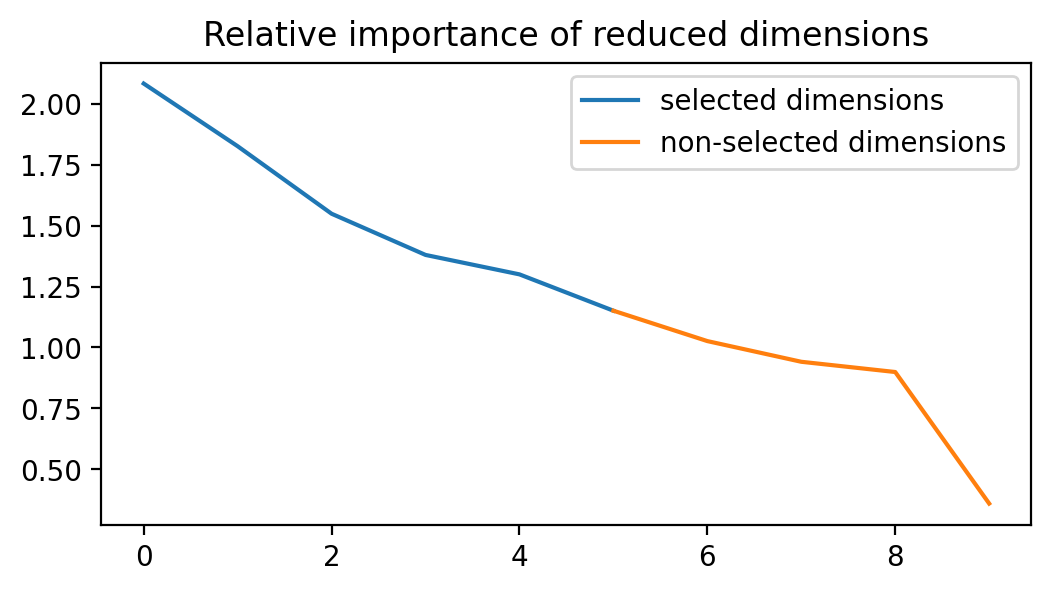

In [222]:
buff = np.full(num_dimensions, np.nan)

plt.figure(figsize=(6,3))
plt.plot(np.hstack([Sigma[:num_dimensions+1], buff]))
plt.plot(np.hstack([buff, Sigma[num_dimensions:]])) 
plt.legend(['selected dimensions', 'non-selected dimensions'])
plt.title("Relative importance of reduced dimensions")

Sigma

In [223]:
def plot_data(mat, data_type, camera=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if camera != None:
        ax.view_init(elev=camera[0], azim=camera[1])
    for index, row in mat.iterrows():
        ax.scatter(row[0], row[1], row[2], alpha=0.8)
        ax.text(row[0], row[1], row[2],'{0} {1}'.format(data_type, index), size=10)
    plt.title(f"{data_type} similarity")
    plt.show()

3 dimensions seems way too low in this instance, but it does allow the relative distances of each point to be visualised.

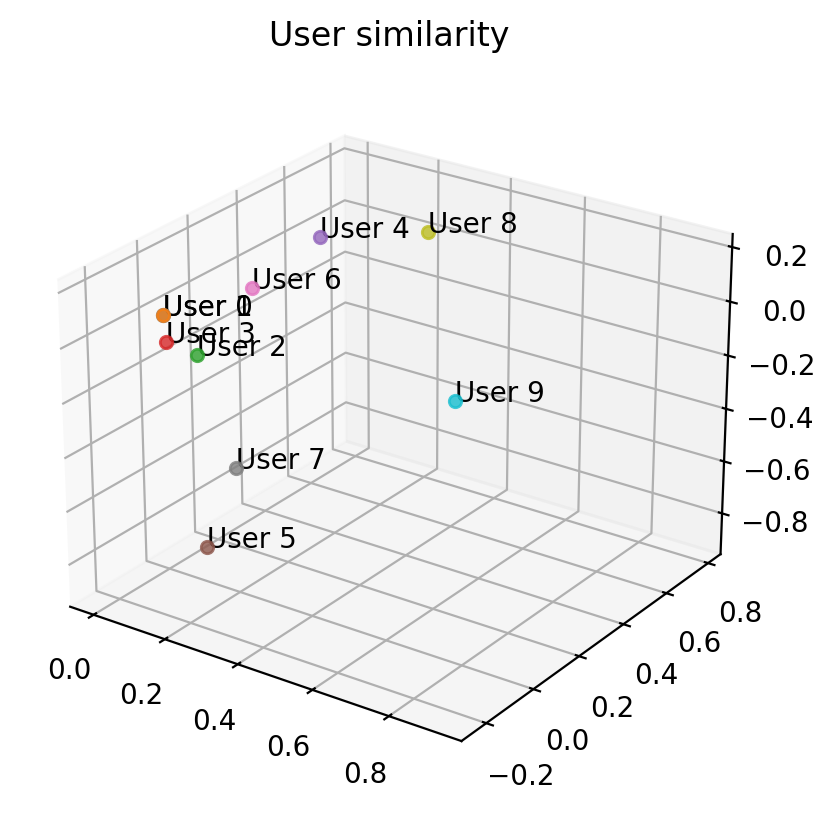

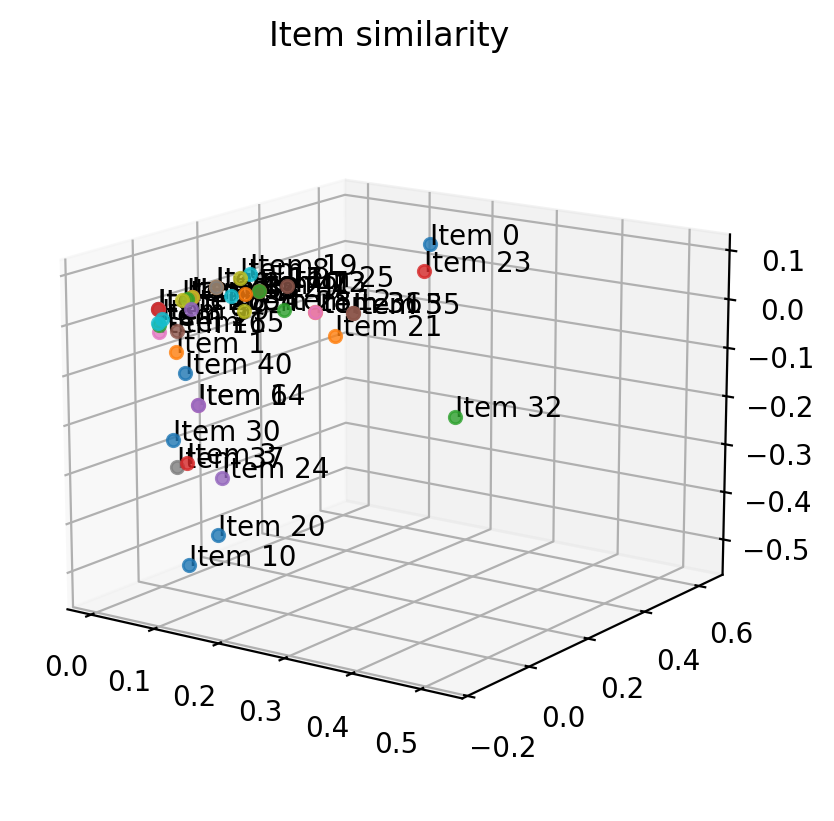

In [224]:
plot_data(U.iloc[:, 0:3], "User", [25, -55])

plot_data(Vh.T.iloc[:, 0:3], "Item", [15, -55])


In [225]:
# get n most similar items using dot product

def recommend_items(item_id, n=5, method="dot"):
    item_idx = np.argmax(items == item_id)
    distances = np.dot(Vh[item_idx], Vh)
    indices = np.argpartition(-distances, (n+1))[:(n+1)][::-1]
    return items[indices[indices != item_idx][:n]]


recommendations = recommend_items("I1003")
recommendations

array(['I1045', 'I1021', 'I1054', 'I1058', 'I1047'], dtype=object)